In [4]:
# %load /home/felipe/firstcell.py
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
pd.set_option('display.max_columns',1000)

import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
df = pd.DataFrame({
    'user_id':[1,2,1,3,3,],
    'content_id':[1,1,2,2,2],
    'tag':['cool','nice','clever','clever','not-bad']
})
df

,content_id,tag,user_id
0,1,cool,1
1,1,nice,2
2,2,clever,1
3,2,clever,3
4,2,not-bad,3


In [6]:
df.groupby("content_id")['tag'].apply(lambda tags: ','.join(tags)).to_frame().reset_index()

,content_id,tag
0,1,"cool,nice"
1,2,"clever,clever,not-bad"


In [7]:
df.groupby("content_id")["user_id"].nunique().to_frame().reset_index().rename(columns={"user_id":'unique_users'})

,content_id,unique_users
0,1,2
1,2,2


### sort groupby groups

In [8]:
df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})
df

,product,value
0,table,20.45
1,chair,22.89
2,chair,32.12
3,mobile phone,111.22
4,table,33.22
5,mobile phone,100.00
6,table,99.99


In [9]:
df.groupby('product')['value'].sum().to_frame().reset_index()

,product,value
0,chair,55.01
1,mobile phone,211.22
2,table,153.66


In [10]:
df.groupby('product')['value'].sum().to_frame().reset_index().sort_values(by='value')

,product,value
0,chair,55.01
2,table,153.66
1,mobile phone,211.22


In [11]:
type(df.groupby('product')['value'])

pandas.core.groupby.groupby.SeriesGroupBy

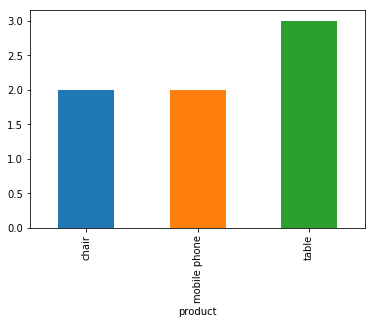

In [17]:
plt.clf()
df.groupby('product').size().plot(kind='bar')
plt.show()

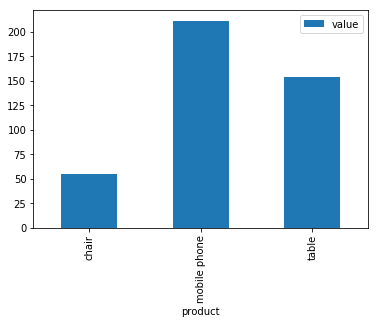

In [18]:
plt.clf()
df.groupby('product').sum().plot(kind='bar')
plt.show()